In [79]:
import numpy as np
import pandas as pd
import scipy
from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz
from sklearn import tree
from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

**Directions**

Pick a dataset. It could be one you've worked with before or it could be a new one. Then build the best decision tree you can.

Now try to match that with the simplest random forest you can. For our purposes measure simplicity with runtime. Compare that to the runtime of the decision tree. This is imperfect but just go with it.

Hopefully out of this you'll see the power of random forests, but also their potential costs. Remember, in the real world you won't necessarily be dealing with thousands of rows. It could be millions, billions, or even more.

In [80]:
df = pd.read_csv("my-settlers-of-catan-games-catanstats.csv")

In [81]:
df.head()

,gameNum,player,points,me,2,3,4,5,6,7,...,Unnamed: 26,production,tradeGain,robberCardsGain,totalGain,tradeLoss,robberCardsLoss,tribute,totalLoss,totalAvailable
0,1,1,5,NaN,1,3,5,8,7,10,...,O,38,5,2,45,10,2,4,16,29
1,1,2,9,1.0,1,3,5,8,7,10,...,O,48,8,6,62,11,1,8,20,42
2,1,3,10,NaN,1,3,5,8,7,10,...,C,44,14,9,67,24,4,0,28,39
3,1,4,5,NaN,1,3,5,8,7,10,...,S,42,12,0,54,24,6,0,30,24
4,2,1,10,NaN,1,6,3,9,10,8,...,2L,60,15,16,91,28,10,0,38,53


In [82]:
df.shape

(200, 36)

In [83]:
df.columns

Index(['gameNum', 'player', 'points', 'me', '2', '3', '4', '5', '6', '7', '8',
       '9', '10', '11', '12', 'settlement1', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'settlement2',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'production', 'tradeGain', 'robberCardsGain',
       'totalGain', 'tradeLoss', 'robberCardsLoss', 'tribute', 'totalLoss',
       'totalAvailable'],
      dtype='object')

In [84]:
df.dtypes

gameNum              int64
player               int64
points               int64
me                 float64
2                    int64
3                    int64
4                    int64
5                    int64
6                    int64
7                    int64
8                    int64
9                    int64
10                   int64
11                   int64
12                   int64
settlement1          int64
Unnamed: 16         object
Unnamed: 17          int64
Unnamed: 18         object
Unnamed: 19          int64
Unnamed: 20         object
settlement2          int64
Unnamed: 22         object
Unnamed: 23          int64
Unnamed: 24         object
Unnamed: 25          int64
Unnamed: 26         object
production           int64
tradeGain            int64
robberCardsGain      int64
totalGain            int64
tradeLoss            int64
robberCardsLoss      int64
tribute              int64
totalLoss            int64
totalAvailable       int64
dtype: object

In [85]:
df.columns = ["GameNumber", "Player", "Points", "Me", 2, 3, 4, 5, 6, 7, 8,
             9, 10, 11, 12, "S1_Num1", "S1_Crop1", "S1_Num2", "S1_Crop2", "S1_Num3", "S1_Crop3",
             "S2_Num1", "S2_Crop1", "S2_Num2", "S2_Crop2", "S2_Num3", "S2_Crop3", "Production", "TradeGain", "RobberCardsGain",
             "TotalGain", "TradeLoss", "RobberCardsLoss", "Tribute", "TotalLoss", "TotalAvailable"]

In [86]:
df.head()

,GameNumber,Player,Points,Me,2,3,4,5,6,7,...,S2_Crop3,Production,TradeGain,RobberCardsGain,TotalGain,TradeLoss,RobberCardsLoss,Tribute,TotalLoss,TotalAvailable
0,1,1,5,NaN,1,3,5,8,7,10,...,O,38,5,2,45,10,2,4,16,29
1,1,2,9,1.0,1,3,5,8,7,10,...,O,48,8,6,62,11,1,8,20,42
2,1,3,10,NaN,1,3,5,8,7,10,...,C,44,14,9,67,24,4,0,28,39
3,1,4,5,NaN,1,3,5,8,7,10,...,S,42,12,0,54,24,6,0,30,24
4,2,1,10,NaN,1,6,3,9,10,8,...,2L,60,15,16,91,28,10,0,38,53


In [87]:
df["Me"].value_counts()

1.0    50
Name: Me, dtype: int64

In [88]:
df["Me"] = np.where(df["Me"].isna(), 0, 1)

In [89]:
df["Me"].value_counts()

0    150
1     50
Name: Me, dtype: int64

In [90]:
df.head()

,GameNumber,Player,Points,Me,2,3,4,5,6,7,...,S2_Crop3,Production,TradeGain,RobberCardsGain,TotalGain,TradeLoss,RobberCardsLoss,Tribute,TotalLoss,TotalAvailable
0,1,1,5,0,1,3,5,8,7,10,...,O,38,5,2,45,10,2,4,16,29
1,1,2,9,1,1,3,5,8,7,10,...,O,48,8,6,62,11,1,8,20,42
2,1,3,10,0,1,3,5,8,7,10,...,C,44,14,9,67,24,4,0,28,39
3,1,4,5,0,1,3,5,8,7,10,...,S,42,12,0,54,24,6,0,30,24
4,2,1,10,0,1,6,3,9,10,8,...,2L,60,15,16,91,28,10,0,38,53


In [91]:
df["S1_Crop1"].value_counts()

O    51
C    40
S    37
L    37
W    35
Name: S1_Crop1, dtype: int64

In [92]:
df[["S1_Crop1", "S1_Crop2", "S1_Crop3", "S2_Crop1", "S2_Crop2", "S2_Crop3"]] = np.where(df[["S1_Crop1", "S1_Crop2", "S1_Crop3", "S2_Crop1", "S2_Crop2", "S2_Crop3"]] == "O", "Ore", 
              (np.where(df[["S1_Crop1", "S1_Crop2", "S1_Crop3", "S2_Crop1", "S2_Crop2", "S2_Crop3"]] == "C", "Clay", 
                       (np.where(df[["S1_Crop1", "S1_Crop2", "S1_Crop3", "S2_Crop1", "S2_Crop2", "S2_Crop3"]] == "L", "Lumber",
                                (np.where(df[["S1_Crop1", "S1_Crop2", "S1_Crop3", "S2_Crop1", "S2_Crop2", "S2_Crop3"]] == "S", "Sheep",
                                         (np.where(df[["S1_Crop1", "S1_Crop2", "S1_Crop3", "S2_Crop1", "S2_Crop2", "S2_Crop3"]] == "W", "Wheat", "Undefined")))))))))

In [93]:
df.head()

,GameNumber,Player,Points,Me,2,3,4,5,6,7,...,S2_Crop3,Production,TradeGain,RobberCardsGain,TotalGain,TradeLoss,RobberCardsLoss,Tribute,TotalLoss,TotalAvailable
0,1,1,5,0,1,3,5,8,7,10,...,Ore,38,5,2,45,10,2,4,16,29
1,1,2,9,1,1,3,5,8,7,10,...,Ore,48,8,6,62,11,1,8,20,42
2,1,3,10,0,1,3,5,8,7,10,...,Clay,44,14,9,67,24,4,0,28,39
3,1,4,5,0,1,3,5,8,7,10,...,Sheep,42,12,0,54,24,6,0,30,24
4,2,1,10,0,1,6,3,9,10,8,...,Undefined,60,15,16,91,28,10,0,38,53


In [94]:
df["S1_Crop2"].value_counts()

Wheat     51
Ore       43
Lumber    43
Sheep     35
Clay      28
Name: S1_Crop2, dtype: int64

In [95]:
df.head()

,GameNumber,Player,Points,Me,2,3,4,5,6,7,...,S2_Crop3,Production,TradeGain,RobberCardsGain,TotalGain,TradeLoss,RobberCardsLoss,Tribute,TotalLoss,TotalAvailable
0,1,1,5,0,1,3,5,8,7,10,...,Ore,38,5,2,45,10,2,4,16,29
1,1,2,9,1,1,3,5,8,7,10,...,Ore,48,8,6,62,11,1,8,20,42
2,1,3,10,0,1,3,5,8,7,10,...,Clay,44,14,9,67,24,4,0,28,39
3,1,4,5,0,1,3,5,8,7,10,...,Sheep,42,12,0,54,24,6,0,30,24
4,2,1,10,0,1,6,3,9,10,8,...,Undefined,60,15,16,91,28,10,0,38,53


In [96]:
df = pd.get_dummies(df)

In [97]:
df.head(10)

,GameNumber,Player,Points,Me,2,3,4,5,6,7,...,S2_Crop2_Ore,S2_Crop2_Sheep,S2_Crop2_Undefined,S2_Crop2_Wheat,S2_Crop3_Clay,S2_Crop3_Lumber,S2_Crop3_Ore,S2_Crop3_Sheep,S2_Crop3_Undefined,S2_Crop3_Wheat
0,1,1,5,0,1,3,5,8,7,10,...,0,0,0,1,0,0,1,0,0,0
1,1,2,9,1,1,3,5,8,7,10,...,0,1,0,0,0,0,1,0,0,0
2,1,3,10,0,1,3,5,8,7,10,...,0,1,0,0,1,0,0,0,0,0
3,1,4,5,0,1,3,5,8,7,10,...,0,0,0,0,0,0,0,1,0,0
4,2,1,10,0,1,6,3,9,10,8,...,0,0,0,0,0,0,0,0,1,0
5,2,2,6,0,1,6,3,9,10,8,...,0,0,0,0,0,0,0,0,0,1
6,2,3,4,1,1,6,3,9,10,8,...,0,0,0,1,0,1,0,0,0,0
7,2,4,9,0,1,6,3,9,10,8,...,0,0,0,0,0,0,0,1,0,0
8,3,1,5,0,0,3,3,10,10,4,...,0,0,0,0,0,0,0,1,0,0
9,3,2,10,0,0,3,3,10,10,4,...,0,0,0,1,0,0,0,1,0,0


In [98]:
df["How_You_Fare"] = np.where(df["Points"] < 6, "Loser", (np.where((5 < df["Points"]) & (df["Points"] < 8), "Average", 
                                                                   (np.where((df["Points"] > 7) & (df["Points"] < 10), "Competitive",
                                                                            (np.where(df["Points"] == 10, "Winner", "Undefined")))))))

In [99]:
df.head(10)

,GameNumber,Player,Points,Me,2,3,4,5,6,7,...,S2_Crop2_Sheep,S2_Crop2_Undefined,S2_Crop2_Wheat,S2_Crop3_Clay,S2_Crop3_Lumber,S2_Crop3_Ore,S2_Crop3_Sheep,S2_Crop3_Undefined,S2_Crop3_Wheat,How_You_Fare
0,1,1,5,0,1,3,5,8,7,10,...,0,0,1,0,0,1,0,0,0,Loser
1,1,2,9,1,1,3,5,8,7,10,...,1,0,0,0,0,1,0,0,0,Competitive
2,1,3,10,0,1,3,5,8,7,10,...,1,0,0,1,0,0,0,0,0,Winner
3,1,4,5,0,1,3,5,8,7,10,...,0,0,0,0,0,0,1,0,0,Loser
4,2,1,10,0,1,6,3,9,10,8,...,0,0,0,0,0,0,0,1,0,Winner
5,2,2,6,0,1,6,3,9,10,8,...,0,0,0,0,0,0,0,0,1,Average
6,2,3,4,1,1,6,3,9,10,8,...,0,0,1,0,1,0,0,0,0,Loser
7,2,4,9,0,1,6,3,9,10,8,...,0,0,0,0,0,0,1,0,0,Competitive
8,3,1,5,0,0,3,3,10,10,4,...,0,0,0,0,0,0,1,0,0,Loser
9,3,2,10,0,0,3,3,10,10,4,...,0,0,1,0,0,0,1,0,0,Winner


In [100]:
df.columns

Index([        'GameNumber',             'Player',             'Points',
                       'Me',                    2,                    3,
                          4,                    5,                    6,
                          7,                    8,                    9,
                         10,                   11,                   12,
                  'S1_Num1',            'S1_Num2',            'S1_Num3',
                  'S2_Num1',            'S2_Num2',            'S2_Num3',
               'Production',          'TradeGain',    'RobberCardsGain',
                'TotalGain',          'TradeLoss',    'RobberCardsLoss',
                  'Tribute',          'TotalLoss',     'TotalAvailable',
            'S1_Crop1_Clay',    'S1_Crop1_Lumber',       'S1_Crop1_Ore',
           'S1_Crop1_Sheep',     'S1_Crop1_Wheat',      'S1_Crop2_Clay',
          'S1_Crop2_Lumber',       'S1_Crop2_Ore',     'S1_Crop2_Sheep',
           'S1_Crop2_Wheat',      'S1_Crop3_Clay', 

In [101]:
points_earned = pd.DataFrame(df["How_You_Fare"])

In [102]:
del df["Points"]

In [103]:
gameplay = df.drop("How_You_Fare", 1)

In [104]:
gameplay.head()

,GameNumber,Player,Me,2,3,4,5,6,7,8,...,S2_Crop2_Ore,S2_Crop2_Sheep,S2_Crop2_Undefined,S2_Crop2_Wheat,S2_Crop3_Clay,S2_Crop3_Lumber,S2_Crop3_Ore,S2_Crop3_Sheep,S2_Crop3_Undefined,S2_Crop3_Wheat
0,1,1,0,1,3,5,8,7,10,6,...,0,0,0,1,0,0,1,0,0,0
1,1,2,1,1,3,5,8,7,10,6,...,0,1,0,0,0,0,1,0,0,0
2,1,3,0,1,3,5,8,7,10,6,...,0,1,0,0,1,0,0,0,0,0
3,1,4,0,1,3,5,8,7,10,6,...,0,0,0,0,0,0,0,1,0,0
4,2,1,0,1,6,3,9,10,8,14,...,0,0,0,0,0,0,0,0,1,0


In [105]:
points_earned.head()

,How_You_Fare
0,Loser
1,Competitive
2,Winner
3,Loser
4,Winner


In [106]:
points_earned["How_You_Fare"].unique()

array(['Loser', 'Competitive', 'Winner', 'Average', 'Undefined'],
      dtype=object)

In [107]:
gameplay.columns

Index([        'GameNumber',             'Player',                 'Me',
                          2,                    3,                    4,
                          5,                    6,                    7,
                          8,                    9,                   10,
                         11,                   12,            'S1_Num1',
                  'S1_Num2',            'S1_Num3',            'S2_Num1',
                  'S2_Num2',            'S2_Num3',         'Production',
                'TradeGain',    'RobberCardsGain',          'TotalGain',
                'TradeLoss',    'RobberCardsLoss',            'Tribute',
                'TotalLoss',     'TotalAvailable',      'S1_Crop1_Clay',
          'S1_Crop1_Lumber',       'S1_Crop1_Ore',     'S1_Crop1_Sheep',
           'S1_Crop1_Wheat',      'S1_Crop2_Clay',    'S1_Crop2_Lumber',
             'S1_Crop2_Ore',     'S1_Crop2_Sheep',     'S1_Crop2_Wheat',
            'S1_Crop3_Clay',    'S1_Crop3_Lumber', 

In [108]:
gameplay.columns

Index([        'GameNumber',             'Player',                 'Me',
                          2,                    3,                    4,
                          5,                    6,                    7,
                          8,                    9,                   10,
                         11,                   12,            'S1_Num1',
                  'S1_Num2',            'S1_Num3',            'S2_Num1',
                  'S2_Num2',            'S2_Num3',         'Production',
                'TradeGain',    'RobberCardsGain',          'TotalGain',
                'TradeLoss',    'RobberCardsLoss',            'Tribute',
                'TotalLoss',     'TotalAvailable',      'S1_Crop1_Clay',
          'S1_Crop1_Lumber',       'S1_Crop1_Ore',     'S1_Crop1_Sheep',
           'S1_Crop1_Wheat',      'S1_Crop2_Clay',    'S1_Crop2_Lumber',
             'S1_Crop2_Ore',     'S1_Crop2_Sheep',     'S1_Crop2_Wheat',
            'S1_Crop3_Clay',    'S1_Crop3_Lumber', 

In [109]:
gameplay.head(10)

,GameNumber,Player,Me,2,3,4,5,6,7,8,...,S2_Crop2_Ore,S2_Crop2_Sheep,S2_Crop2_Undefined,S2_Crop2_Wheat,S2_Crop3_Clay,S2_Crop3_Lumber,S2_Crop3_Ore,S2_Crop3_Sheep,S2_Crop3_Undefined,S2_Crop3_Wheat
0,1,1,0,1,3,5,8,7,10,6,...,0,0,0,1,0,0,1,0,0,0
1,1,2,1,1,3,5,8,7,10,6,...,0,1,0,0,0,0,1,0,0,0
2,1,3,0,1,3,5,8,7,10,6,...,0,1,0,0,1,0,0,0,0,0
3,1,4,0,1,3,5,8,7,10,6,...,0,0,0,0,0,0,0,1,0,0
4,2,1,0,1,6,3,9,10,8,14,...,0,0,0,0,0,0,0,0,1,0
5,2,2,0,1,6,3,9,10,8,14,...,0,0,0,0,0,0,0,0,0,1
6,2,3,1,1,6,3,9,10,8,14,...,0,0,0,1,0,1,0,0,0,0
7,2,4,0,1,6,3,9,10,8,14,...,0,0,0,0,0,0,0,1,0,0
8,3,1,0,0,3,3,10,10,4,5,...,0,0,0,0,0,0,0,1,0,0
9,3,2,0,0,3,3,10,10,4,5,...,0,0,0,1,0,0,0,1,0,0


In [110]:
gameplay.head()

,GameNumber,Player,Me,2,3,4,5,6,7,8,...,S2_Crop2_Ore,S2_Crop2_Sheep,S2_Crop2_Undefined,S2_Crop2_Wheat,S2_Crop3_Clay,S2_Crop3_Lumber,S2_Crop3_Ore,S2_Crop3_Sheep,S2_Crop3_Undefined,S2_Crop3_Wheat
0,1,1,0,1,3,5,8,7,10,6,...,0,0,0,1,0,0,1,0,0,0
1,1,2,1,1,3,5,8,7,10,6,...,0,1,0,0,0,0,1,0,0,0
2,1,3,0,1,3,5,8,7,10,6,...,0,1,0,0,1,0,0,0,0,0
3,1,4,0,1,3,5,8,7,10,6,...,0,0,0,0,0,0,0,1,0,0
4,2,1,0,1,6,3,9,10,8,14,...,0,0,0,0,0,0,0,0,1,0


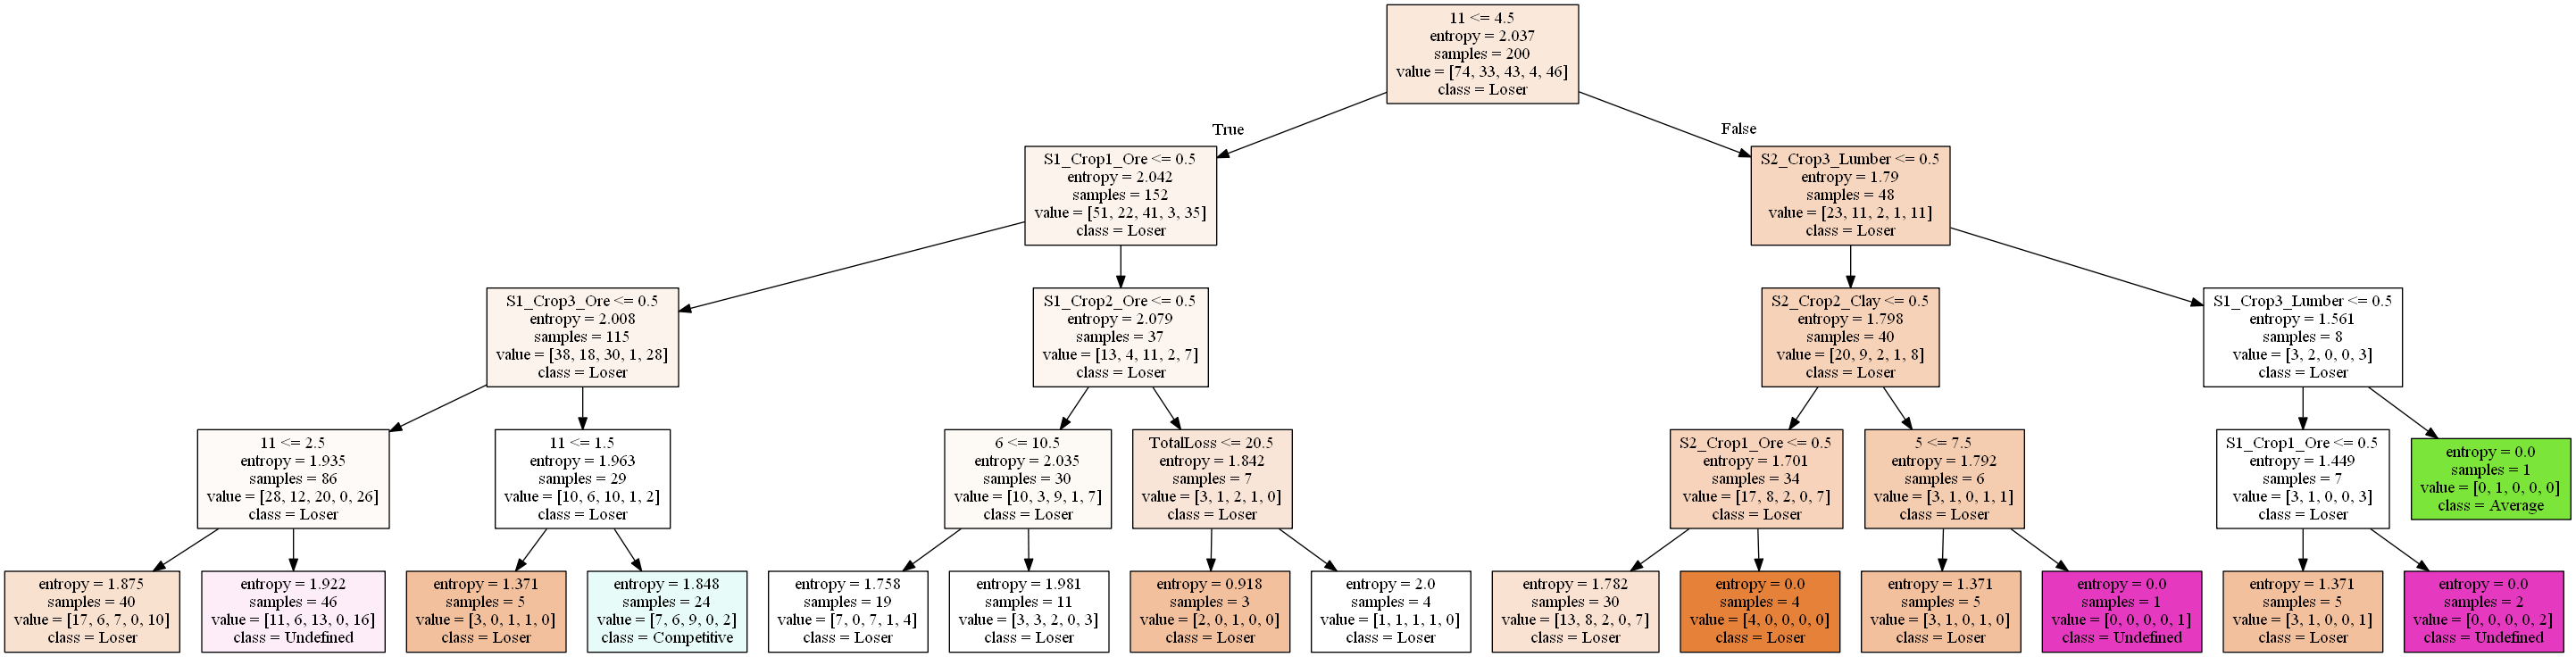

In [120]:

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4
)
model = decision_tree.fit(gameplay, points_earned)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=gameplay.columns,
    class_names=["Loser", "Average", "Competitive", "Winner", "Undefined"],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [35]:
y_pred = model.predict(gameplay)
print("Number of mislabeled points out of a total of {} points: {}".format(gameplay.shape[0], (points_earned["How_You_Fare"] != y_pred).sum()))

Number of mislabeled points out of a total of 200 points: 111


In [122]:
print("Accuracy of Decision Tree is", 89/200)

Accuracy of Decision Tree is 0.445


### Random Forest

In [113]:
from sklearn.decomposition import PCA 

X = gameplay
sklearn_pca = PCA()
Y_sklearn = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [6.25958167e-01 1.48120471e-01 6.82415606e-02 3.66074914e-02
 2.14063288e-02 1.69353175e-02 1.37819731e-02 1.04202659e-02
 9.41856306e-03 8.19308992e-03 5.99393481e-03 5.27909101e-03
 4.51090903e-03 3.99323204e-03 3.29816717e-03 2.79313491e-03
 2.62765411e-03 2.17690331e-03 1.42861028e-03 1.35966008e-03
 1.17742699e-03 1.06256537e-03 8.92311937e-04 8.37500937e-04
 5.17880649e-04 2.27401102e-04 2.12720464e-04 1.88962041e-04
 1.77450296e-04 1.64858866e-04 1.60575059e-04 1.52229311e-04
 1.42693132e-04 1.27988168e-04 1.25069342e-04 1.22577353e-04
 1.18611916e-04 1.07786872e-04 1.04052681e-04 1.02321924e-04
 9.33894196e-05 9.11560187e-05 8.58760842e-05 7.05800608e-05
 6.91994449e-05 6.28719670e-05 5.98621190e-05 5.24898865e-05
 4.34978296e-05 4.18516163e-05 3.42470930e-05 2.43239661e-05
 3.14508959e-06 1.23448482e-31 5.11352053e-33 3.73519544e-33
 3.73519544e-33 3.73519544e-33 3.73519544e-33 3.735

In [114]:
sklearn_pca.explained_variance_ratio_.cumsum()

array([0.62595817, 0.77407864, 0.8423202 , 0.87892769, 0.90033402,
       0.91726934, 0.93105131, 0.94147158, 0.95089014, 0.95908323,
       0.96507716, 0.97035625, 0.97486716, 0.9788604 , 0.98215856,
       0.9849517 , 0.98757935, 0.98975625, 0.99118486, 0.99254452,
       0.99372195, 0.99478452, 0.99567683, 0.99651433, 0.99703221,
       0.99725961, 0.99747233, 0.99766129, 0.99783874, 0.9980036 ,
       0.99816418, 0.99831641, 0.9984591 , 0.99858709, 0.99871216,
       0.99883474, 0.99895335, 0.99906113, 0.99916519, 0.99926751,
       0.9993609 , 0.99945205, 0.99953793, 0.99960851, 0.99967771,
       0.99974058, 0.99980044, 0.99985293, 0.99989643, 0.99993828,
       0.99997253, 0.99999685, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [117]:
#the first ten components explain 95.9% of the variance

sk_learn = PCA(n_components=10)
X_with10_components = sk_learn.fit_transform(X)

In [118]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
Y = points_earned
X = X_with10_components

cross_val_score(rfc, X, Y, cv=10)

C:\Users\jesst\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\jesst\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jesst\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jesst\AppData\Local\Continuum\anaconda3\lib\site-packages\sk

array([0.43478261, 0.56521739, 0.47826087, 0.28571429, 0.52631579,
       0.52631579, 0.33333333, 0.61111111, 0.44444444, 0.66666667])